# Question 2.  Data preprocessing for supervised analysis

In this assignment, you will be working with another mystery dataset. Your task will be to load and explore the dataset, split the data into training and test sets and visualise the resulting class distribution. You will also be expected to justify your strategy for the data split.

You should submit your assignment as a fully commented code with all plots included. It should be clear where any plots produced originate. Your should provide an interpretation of your results throughout. The ideal format is .ipynb and the accompanying .html file including plots and comments. Other formats are acceptable as long as code can be copied and tested for accuracy, but the presentation of the results is important.



In [4]:
#load the libraries

%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split


## 1.	Load and describe the data [7 marks]

1.1 What is the number of samples and features?

1.2 Which features are categorical, which are continuous?

1.3 Which column has the class label?

1.4 How many classes are there in the data?

1.5 How many samples do you have per class?


In [8]:
df = pd.read_csv('mysteryDataSplit.csv')
df

#from the data imported, we can state that the number of samples are 1000 based on the rows and we have columns labeled 0-19 which indicates 20 features
#the features 0-19 or 20 the 20 features have all real numbers in them so they are considered continuous
#the class column or column 21 has the class label which is considered a categorical data

#let's define the number of unique class labels
unique_classes = df['Class'].unique()

unique_classes

#now lets count the total number of classes
print(len(unique_classes))
#there are 5 unique classes

#for the next instance we can use a value counts function to count how many samples are in each class

df['Class'].value_counts(ascending=True)


5


Class
3    196
4    199
0    200
2    201
1    204
Name: count, dtype: int64

## 2. Splitting the dataset into training and test data [6 marks]

2.1 Split the dataset into training data and test data with random class proportions.

Random class proportion means that it does not matter how many examples of each class do you have in the training and the test sets.


In [9]:
#we can use the train_test_split function from sklearn.model_selection module

#first we will need to separate the columns 
#X are the data not including the classes 
#Y is the classes column

X=df.drop('Class', axis=1) #all columns except class label
y=df['Class'] #the class label column

#now we can split the data into training and test sets
#we will use a test size proportion of data to use for test set 
#equal to 0.2 or 20%
#we will use a random state of 50 to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

#lets print all the outputs to visualize
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

#now let's print the number of propotions of the 
#training and dataset
#we can use the value_counts function again
#we will use the normalize=True to get the relative
#frequency of each assigned glass in the two
#datasets y_train and y_test

print("\nClass proportions in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass proportions in y_test:")
print(y_test.value_counts(normalize=True))


X_train shape: (800, 20)
y_train shape: (800,)
X_test shape: (200, 20)
y_test shape: (200,)

Class proportions in y_train:
Class
4    0.20750
0    0.20750
1    0.19875
3    0.19375
2    0.19250
Name: proportion, dtype: float64

Class proportions in y_test:
Class
2    0.235
1    0.225
3    0.205
0    0.170
4    0.165
Name: proportion, dtype: float64


2.2 Visualize the class assignment in each part of your split.

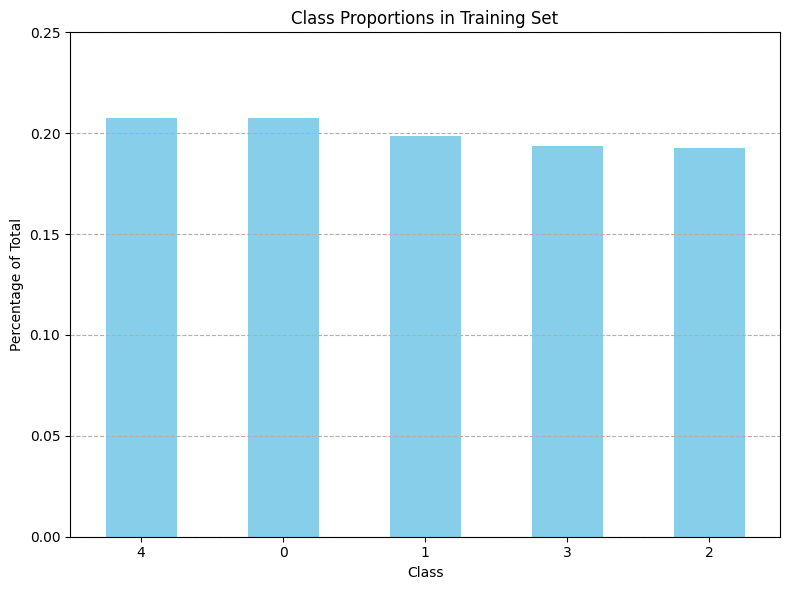

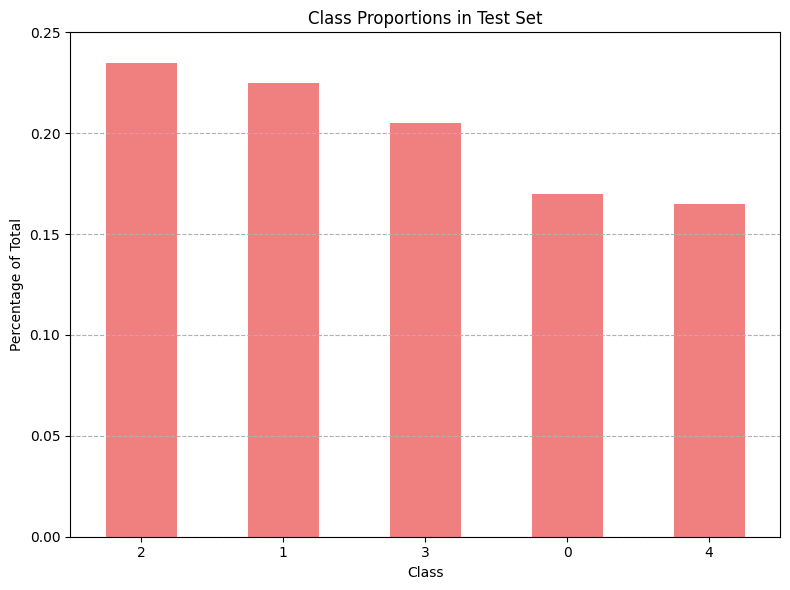

In [10]:
#Count classes in each
#plot counts and proportion (each count as a % of total in the split)

#we will plot the counts
#lets define the training proportions

train_proportions = y_train.value_counts(normalize=True)
#next we can create a bar plot for y train

plt.figure(figsize=(8, 6))
train_proportions.plot(kind='bar', color='skyblue')
plt.title('Class Proportions in Training Set')
plt.xlabel('Class')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=0)  # we keep x-axis labels horizontal
plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25]) # Customize y-axis ticks if needed
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#then repeat the same thing above with the test set
test_proportions = y_test.value_counts(normalize=True)

plt.figure(figsize=(8, 6))
test_proportions.plot(kind='bar', color='lightcoral')
plt.title('Class Proportions in Test Set')
plt.xlabel('Class')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=0)
plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


2.3 What is the risk of this? Explain.

The risk of using a random data split includes:

Uneven class distribution in subsets:the random split may result in test and training sets that do not have equal class proportions as the original dataset. Sometimes even classes themselves can be missing in the training or dataset

Inconsistent/Inaccurate Training: Due to random data split if the classes are missing or misrepresented training cannot effectively classify the classes

Potential loss of information for rare classes: 
For some datasets with few examples of certain classes, a random proportional 

## 3. Proportional split [3 marks]

Repeat the above split and visualisation but with a proportional split, rather than a random split. In a proportional split, the class distribution within the test set should mirror the class distribution within the training set.

X_train shape: (800, 20)
y_train shape: (800,)
X_test shape: (200, 20)
y_test shape: (200,)


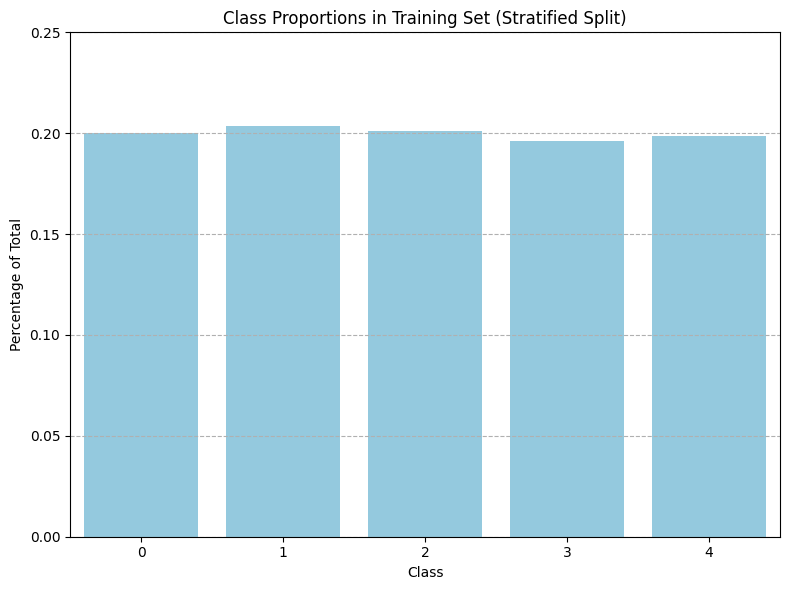

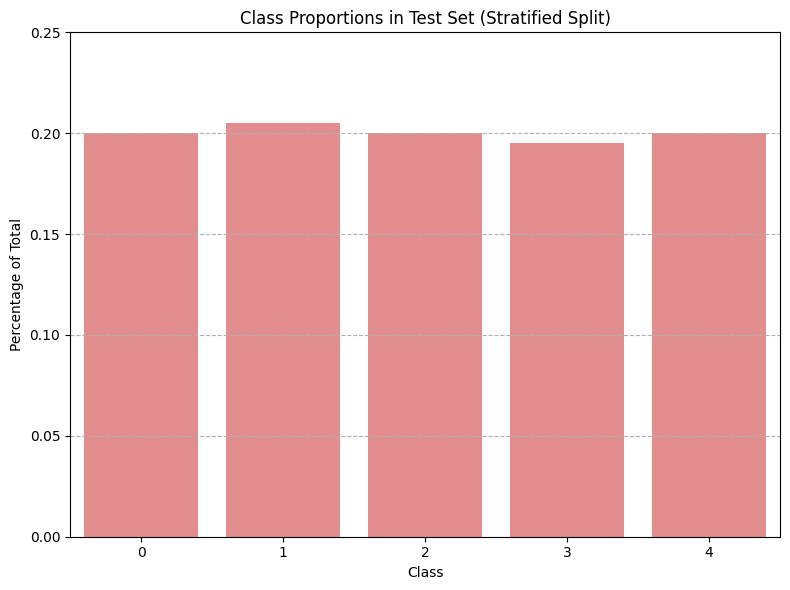


Class proportions in y_train (Stratified):
Class
0    0.20000
1    0.20375
2    0.20125
3    0.19625
4    0.19875
Name: proportion, dtype: float64

Class proportions in y_test (Stratified):
Class
0    0.200
1    0.205
2    0.200
3    0.195
4    0.200
Name: proportion, dtype: float64


In [11]:
#now we will have a proportional split
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#first use a stratified split with the 
#train_test_split function to ensure a proportional split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50, stratify=y
)

#now similarly to before check the shape of the 
#sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

#next visualize the class proportions in the training set
#we will use seaborn barplot for visualization
train_proportions = y_train.value_counts(normalize=True).sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=train_proportions.index, y=train_proportions.values, color='skyblue')
plt.title('Class Proportions in Training Set (Stratified Split)')
plt.xlabel('Class')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=0)
plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#class proportions visualization in the test set
test_proportions = y_test.value_counts(normalize=True).sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=test_proportions.index, y=test_proportions.values, color='lightcoral')
plt.title('Class Proportions in Test Set (Stratified Split)')
plt.xlabel('Class')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=0)
plt.yticks([0.0, 0.05, 0.10, 0.15, 0.20, 0.25])
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#print the class proportions 
print("\nClass proportions in y_train (Stratified):")
print(y_train.value_counts(normalize=True).sort_index())

print("\nClass proportions in y_test (Stratified):")
print(y_test.value_counts(normalize=True).sort_index())


## 4. Your approach [4 marks]

When you split your dataset, what split (e.g. 90/10) and what class distribution approach would you prefer to use and why? Briefly explain.

An 80/20 split will be used since sufficent data is utilized for training and 80% is enough to have a reasonable test size left over of 20% to balance between learning and evaluation. Stratified split is used for ensuring representative subsets, increased reliable model evaluation, more stable results, and increased performance on minority classes. 